In [364]:
import requests, zipfile
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsentropy_c1
import pandas as pd
%matplotlib inline

#### データ準備

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

In [3]:
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

In [4]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
          'body-style', 'drive-wheel', 'engine-location', 'wheel-base', 'length', 'width', 'height',
          'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
auto.columns = columns

In [6]:
auto.to_csv("./automobile.csv", index=False)

In [7]:
# ここでは horsepower, width, heightだけを使用してpriceを予測する
auto = auto[['price', 'horsepower', 'width', 'height']]

In [8]:
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [9]:
# ここでは空白データは少ないので行ごと消去する
auto = auto.replace('?', np.nan).dropna()

In [10]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 4 columns):
price         199 non-null object
horsepower    199 non-null object
width         199 non-null float64
height        199 non-null float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [11]:
# object形式を数値形式に変換
auto.dtypes

price          object
horsepower     object
width         float64
height        float64
dtype: object

In [12]:
auto[['price', 'horsepower']] = auto[['price', 'horsepower']].astype(np.int64)
auto.dtypes

price           int64
horsepower      int64
width         float64
height        float64
dtype: object

#### 相関の確認

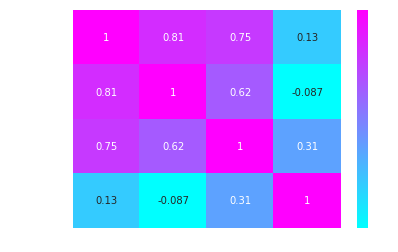

In [13]:
sns.heatmap(auto.corr(), annot=True, cmap='cool')

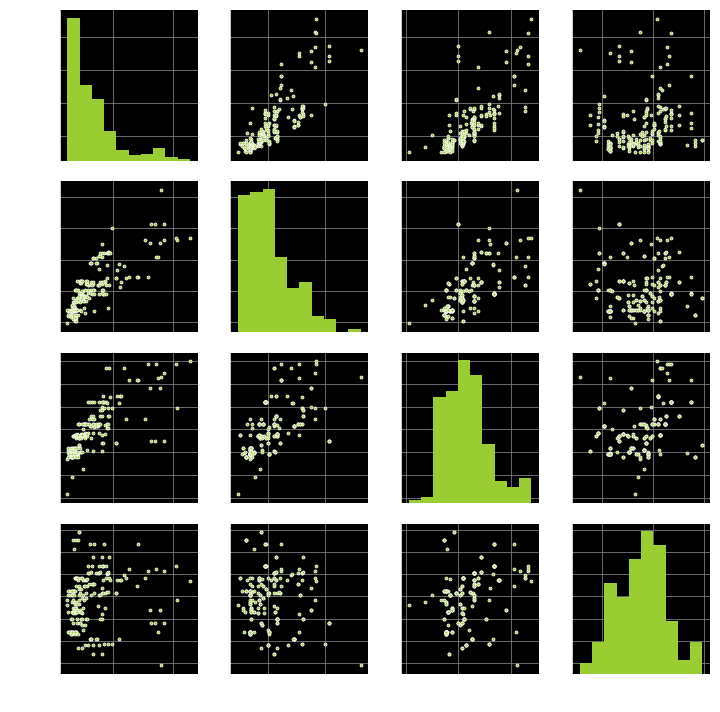

In [14]:
sns.pairplot(auto)

#### データ分割

In [15]:
from sklearn.model_selection import  train_test_split
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### 重回帰分析

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("決定係数[train]: ", lr.score(X_train, y_train))
print("決定係数[test] : ", lr.score(X_test, y_test))
print("回帰係数:\n", pd.Series(lr.coef_, index=X.columns))
print("切片    : ", lr.intercept_)

決定係数[train]:  0.7333575683901379
決定係数[test] :  0.7370688738125767
回帰係数:
 horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片    :  -128409.04630338575


#### ロジスティック回帰

In [18]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
res = requests.get(url).content
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)


In [19]:
adult.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
               "hours-per-week", "native-country", "flg-50k"]

In [20]:
adult.to_csv("adult.csv", index=False)

In [21]:
# 収入が 50k以下: 0, 50k以上: 1に変換
adult["flg-50k"] = adult["flg-50k"].map(lambda x: 1 if x==" >50K" else 0)

In [22]:
adult.groupby("flg-50k").size()

flg-50k
0    24720
1     7841
dtype: int64

In [23]:
adult[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "flg-50k"]].corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,flg-50k
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.150526
flg-50k,0.234037,-0.009463,0.335154,0.223329,0.150526,1.000000


In [24]:
pick0 = adult[adult["flg-50k"] == 0]
pick1 = adult[adult["flg-50k"] == 1]

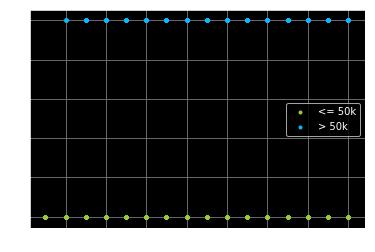

In [25]:
plt.scatter(pick0["education-num"], pick0["flg-50k"], label = "<= 50k")
plt.scatter(pick1["education-num"], pick1["flg-50k"], label = "> 50k")
plt.legend()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
X = adult[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]].values
y = adult["flg-50k"].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print("正解率(train): {:.3f}".format(lr.score(X_train, y_train)))
print("正解率(test): {:.3f}".format(lr.score(X_test, y_test)))

正解率(train): 0.796
正解率(test): 0.797


In [31]:
np.abs(1 - lr.predict(X_train) - y_train).sum() / len(y_train)

0.7964373464373464

In [32]:
#オッズ比 (係数が1増加した際に結果に与える影響、係数のexp)
np.exp(lr.coef_)

array([[0.99550002, 0.99999428, 0.99891864, 1.00031592, 1.00072328]])

In [33]:
# 正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

lr_sc = LogisticRegression()
lr_sc.fit(X_train_sc, y_train)

/Users/yugi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yugi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yugi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
print("正解率(train): {:.3f}".format(lr_sc.score(X_train_sc, y_train)))
print("正解率(test): {:.3f}".format(lr_sc.score(X_test_sc, y_test)))

正解率(train): 0.811
正解率(test): 0.810


#### リッジ回帰

In [35]:
auto = pd.read_csv("automobile.csv")
auto = auto[['price', 'horsepower', 'width', 'height']]
auto = auto.replace("?", np.nan).dropna()
X = auto.drop("price", axis=1).values
y = auto["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge()
lr = LinearRegression()

In [37]:
for model in [ridge, lr]:
    model.fit(X_train, y_train)
    print("{}(train):{:.6f}".format(model.__class__.__name__, model.score(X_train, y_train)))
    print("{}(test):{:.6f}".format(model.__class__.__name__, model.score(X_test, y_test)))

Ridge(train):0.733355
Ridge(test):0.737768
LinearRegression(train):0.733358
LinearRegression(test):0.737069


#### 決定木

In [305]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
res = requests.get(url).content
df = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

In [306]:
columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises",
          "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
          "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
          "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
          "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

In [307]:
df.columns = columns

In [308]:
df.to_csv("mashroom.csv", index=False)

In [61]:
# gill_color(ひだの色)、gill_attachment(ひだの付き方)、odor(匂い)、cap_color(かさの色)
df_dummy = pd.get_dummies(df[["gill_color", "gill_attachment", "odor", "cap_color"]])
df_dummy["flg"] = df["classes"].map(lambda x: 1 if x=="p" else 0)

In [84]:
df_dummy.groupby(["cap_color_r", "flg"])["flg"].count().unstack()

flg,0,1
cap_color_r,,
0,4192.0,3916.0
1,16.0,NaN


In [77]:
df_dummy.columns

Index(['gill_color_b', 'gill_color_e', 'gill_color_g', 'gill_color_h',
       'gill_color_k', 'gill_color_n', 'gill_color_o', 'gill_color_p',
       'gill_color_r', 'gill_color_u', 'gill_color_w', 'gill_color_y',
       'gill_attachment_a', 'gill_attachment_f', 'odor_f', 'odor_t',
       'cap_color_b', 'cap_color_c', 'cap_color_e', 'cap_color_g',
       'cap_color_n', 'cap_color_p', 'cap_color_r', 'cap_color_u',
       'cap_color_w', 'cap_color_y', 'flg'],
      dtype='object')

#### 情報エントロピー
$H(S) = -\sum^{n}_{i=1}(p_i log_2 p_i)$

In [89]:
def entropy(p):
    return - p * np.log2(p)

/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


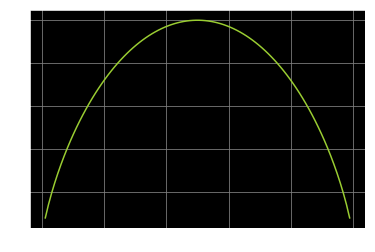

In [90]:
x = np.linspace(0,1,100)
plt.plot(x, entropy(x) + entropy(1-x))

In [152]:
# cap_color_c、cap_color_bそれぞれで分割した場合の情報エントロピーを調べる
gp = df_dummy.groupby(["cap_color_c", "flg"])["flg"].count()
print(gp)

cap_color_c  flg
0            0      4176
             1      3904
1            0        32
             1        12
Name: flg, dtype: int64


In [153]:
# cap_color_c = 0の場合の情報エントロピー
p0 = gp.loc[(0,0)] / (gp.loc[(0,0)] + gp.loc[(0,1)]) 
p1 = 1 - p0
entropy_c0 = entropy(p0) + entropy(p1)
p0 = gp.loc[(1,0)] / (gp.loc[(1,0)] + gp.loc[(1,1)]) 
p1 = 1 - p0
entropy_c1 = entropy(p0) + entropy(p1)
entropy_after = (entropy_c0 * (gp.loc[(0,0)] + gp.loc[(0,1)]) / len(df) + 
             entropy_c1 * (gp.loc[(1,0)] + gp.loc[(1,1)]) / len(df))

In [154]:
print("entropy_p0: {:.3f}".format(entropy_c0))
print("entropy_p1: {:.3f}".format(entropy_c1))
print("分割後のエントロピー: {:.3f}".format(entropy_after))

entropy_p0: 0.999
entropy_p1: 0.845
分割後のエントロピー: 0.998


In [181]:
# cap_color_c、cap_color_bそれぞれで分割した場合の情報エントロピーを調べる
gp = df_dummy.groupby(["gill_color_b", "flg"])["flg"].count()
print(gp)

gill_color_b  flg
0             0      4208
              1      2188
1             1      1728
Name: flg, dtype: int64


In [185]:
# cap_color_c = 0の場合の情報エントロピー
p0 = gp.loc[(0,0)] / (gp.loc[(0,0)] + gp.loc[(0,1)]) 
p1 = 1 - p0
entropy_b0 = entropy(p0) + entropy(p1)
p0 = 0/ (0+ gp.loc[(1,1)]) 
p1 = 1 - p0
entropy_b1 = entropy(p1)
entropy_after = (entropy_b0 * (gp.loc[(0,0)] + gp.loc[(0,1)]) / len(df) + 
             entropy_b1 * (gp.loc[(1,1)]) / len(df))

In [195]:
p0 = df_dummy["flg"].sum() / len(df_dummy)
p1 = 1 - p0
entropy_init = entropy(p0) + entropy(p1)

In [198]:
print("entropy_p0: {:.3f}".format(entropy_b0))
print("entropy_p1: {:.3f}".format(entropy_b1))
print("分割後のエントロピー: {:.3f}".format(entropy_after))
print("情報利得: {:.3f}".format(entropy_init - entropy_after))

entropy_p0: 0.927
entropy_p1: -0.000
分割後のエントロピー: 0.730
情報利得: 0.269


#### 決定木のモデル構築

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [200]:
X = df_dummy.drop('flg', axis=1)
y = df_dummy["flg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [201]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [203]:
print("正解率(train): {:.3f}".format(tree.score(X_train, y_train)))
print("正解率(testr): {:.3f}".format(tree.score(X_test, y_test)))

正解率(train): 0.883
正解率(testr): 0.894


#### k近傍

In [252]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [299]:
data = load_breast_cancer()
df = pd.DataFrame(data["data"])
df.columns = data.feature_names
df["target"] = data.target
X = df.drop(["target"], axis=1)
y = df["target"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=0)

In [315]:
train_accuracy = []
test_accuracy = []

In [302]:
for n_neighbors in range(1,21):
    kn = KNeighborsClassifier(n_neighbors=n_neighbors)
    kn.fit(X_train, y_train)
    train_accuracy.append(kn.score(X_train, y_train))
    test_accuracy.append(kn.score(X_test, y_test))

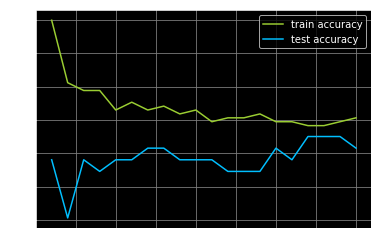

In [303]:
plt.plot(range(1,21), train_accuracy, label="train accuracy")
plt.plot(range(1,21), test_accuracy, label="test accuracy")
plt.legend()

In [405]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data["data"])
df.columns = data.feature_names
df["target"] = data.target
X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [406]:
from sklearn.svm import LinearSVC

In [407]:
svc = LinearSVC(random_state=123)
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)

In [408]:
print("正解率(train): {:.3f}".format(svc.score(X_train, y_train)))
print("正解率(test): {:.3f}".format(svc.score(X_test, y_test)))

正解率(train): 0.927
正解率(test): 0.930


In [409]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [410]:
svc = LinearSVC(random_state=123)
svc.fit(X_train_sc, y_train)
print("正解率(train): {:.3f}".format(svc.score(X_train_sc, y_train)))
print("正解率(test): {:.3f}".format(svc.score(X_test_sc, y_test)))

正解率(train): 0.993
正解率(test): 0.951


#### 練習問題 8-1

In [51]:
df = pd.read_csv("./automobile.csv")
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
          'body-style', 'drive-wheel', 'engine-location', 'wheel-base', 'length', 'width', 'height',
          'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns = columns

In [52]:
df = df.replace("?", np.nan).dropna()

In [53]:
X = np.array(df[['length', 'engine-size']])
y = np.array(df['price'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("決定係数[train]: ", lr.score(X_train, y_train))
print("決定係数[test] : ", lr.score(X_test, y_test))
print("回帰係数:\n", pd.Series(lr.coef_, index=['length', 'engine-size']))
print("切片    : ", lr.intercept_)

決定係数[train]:  0.769964448837223
決定係数[test] :  0.7366652880477025
回帰係数:
 length         191.396043
engine-size    104.758899
dtype: float64
切片    :  -33971.99184768529


#### 練習問題 8-2

In [125]:
from sklearn.datasets import load_breast_cancer

In [131]:
X = load_breast_cancer()["data"]
y = load_breast_cancer()["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [132]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("正解率(train): {:.3f}".format(lr.score(X_train, y_train)))
print("正解率(test): {:.3f}".format(lr.score(X_test, y_test)))

正解率(train): 0.979
正解率(test): 0.926


#### 練習問題 8-3

In [138]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [139]:
lr_sc = LogisticRegression()
lr_sc.fit(X_train_sc, y_train)
print("正解率(train): {:.3f}".format(lr_sc.score(X_train_sc, y_train)))
print("正解率(test): {:.3f}".format(lr_sc.score(X_test_sc, y_test)))

正解率(train): 0.993
正解率(test): 0.958


#### 練習問題 8-4

In [161]:
df = pd.read_csv("./automobile.csv")
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
          'body-style', 'drive-wheel', 'engine-location', 'wheel-base', 'length', 'width', 'height',
          'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns = columns
df = df.replace("?", np.nan).dropna()
X = np.array(df[['length', 'engine-size']])
y = np.array(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [168]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
lasso = Lasso(alpha=1.0)
lr = LinearRegression()
for model in [lasso, ridge, lr]:
    model.fit(X_train, y_train)
    print("{}(train):{:.6f}".format(model.__class__.__name__, model.score(X_train, y_train)))
    print("{}(test):{:.6f}".format(model.__class__.__name__, model.score(X_test, y_test)))

Lasso(train):0.769964
Lasso(test):0.736663
Ridge(train):0.769964
Ridge(test):0.736672
LinearRegression(train):0.769964
LinearRegression(test):0.736665


In [169]:
params = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10, 100]
}

In [171]:
from sklearn.grid_search import GridSearchCV

In [172]:
gridcv = GridSearchCV(lasso, params, cv=3, verbose=2)

#### 練習問題8-5

In [215]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [216]:
df = pd.DataFrame(data["data"])

In [229]:
df.columns = data.feature_names
df["target"] = data.target

In [235]:
X = df.drop(["target"], axis=1)
y = df["target"]

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [250]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [251]:
print("正解率(train): {:.3f}".format(tree.score(X_train, y_train)))
print("正解率(test): {:.3f}".format(tree.score(X_test, y_test)))

正解率(train): 1.000
正解率(test): 0.940


#### 練習問題 8-6

In [344]:
df = pd.read_csv("./mashroom.csv")
columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises",
          "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
          "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
          "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
          "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

df.columns = columns
# gill_color(ひだの色)、gill_attachment(ひだの付き方)、odor(匂い)、cap_color(かさの色)
df_dummy = pd.get_dummies(df[["gill_color", "gill_attachment", "odor", "cap_color"]])
df_dummy["flg"] = df["classes"].map(lambda x: 1 if x=="p" else 0)

In [345]:
X = df_dummy.drop("flg",axis=1)
y = df_dummy["flg"]

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [347]:
train_accuracy = []
test_accuracy = []
for n_neighbors in range(1,21):
    kn = KNeighborsClassifier(n_neighbors=n_neighbors)
    kn.fit(X_train, y_train)
    train_accuracy.append(kn.score(X_train, y_train))
    test_accuracy.append(kn.score(X_test, y_test))

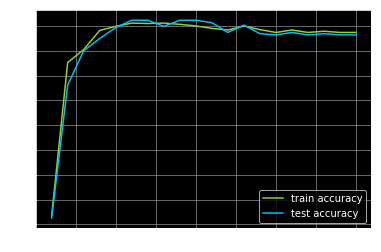

In [348]:
plt.plot(range(1,21), train_accuracy, label="train accuracy")
plt.plot(range(1,21), test_accuracy, label="test accuracy")
plt.legend()

#### 練習問題 8-7

In [361]:
df = pd.read_csv("student-mat.csv", sep=";")

In [362]:
X = df.loc[:, ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel",
              "freetime", "goout", "Dalc", "Walc", "absences", "G1", "G2"]]
y = df["G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [363]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [357]:
mse_train = []
mse_test = []
R_train = []
R_test = []

In [358]:
for n in range(1,21):
    kn = KNeighborsRegressor(n_neighbors=n)
    kn.fit(X_train, y_train)
    R_train.append(kn.score(X_train, y_train))
    R_test.append(kn.score(X_test, y_test))
    mse_train.append(mean_squared_error(y_true=y_train, y_pred=kn.predict(X_train)))
    mse_test.append(mean_squared_error(y_true=y_test, y_pred=kn.predict(X_test)))

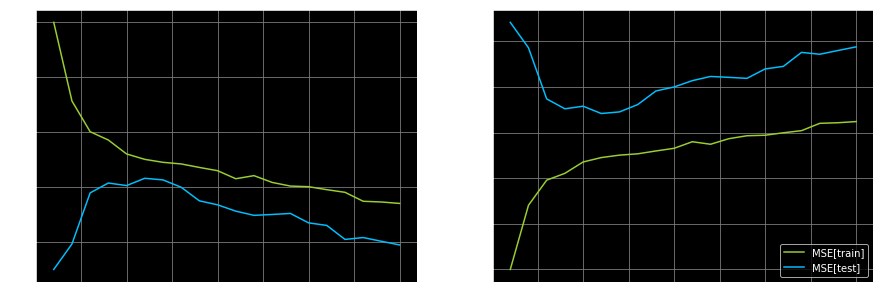

In [359]:
figs, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(range(1,21), R_train, label="R[train]")
axs[0].plot(range(1,21), R_test, label="R[test]")
axs[1].plot(range(1,21), mse_train, label="MSE[train]")
axs[1].plot(range(1,21), mse_test, label="MSE[test]")
plt.legend()

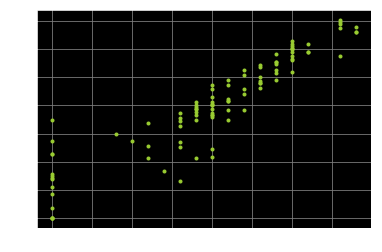

In [335]:
kn = KNeighborsRegressor(n_neighbors=7)
kn.fit(X_train, y_train)
plt.scatter(y_test, kn.predict(X_test))

In [339]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [337]:
mse_train_sc = []
mse_test_sc = []
R_train_sc = []
R_test_sc = []

In [340]:
for n in range(1,21):
    kn = KNeighborsRegressor(n_neighbors=n)
    kn.fit(X_train_sc, y_train)
    R_train_sc.append(kn.score(X_train_sc, y_train))
    R_test_sc.append(kn.score(X_test_sc, y_test))
    mse_train_sc.append(mean_squared_error(y_true=y_train, y_pred=kn.predict(X_train_sc)))
    mse_test_sc.append(mean_squared_error(y_true=y_test, y_pred=kn.predict(X_test_sc)))

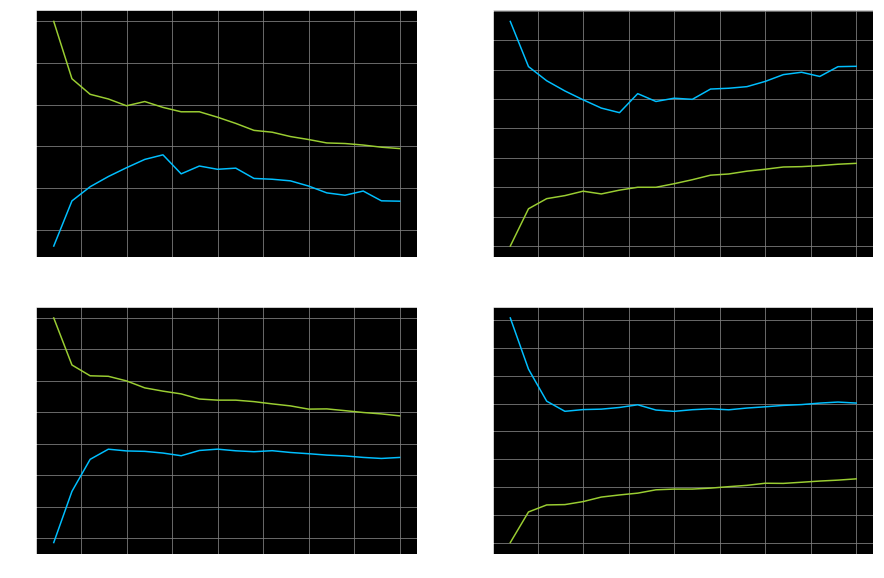

In [343]:
figs, axs = plt.subplots(2,2, figsize=(15,10))
axs[0][0].plot(range(1,21), R_train, label="R[train]")
axs[0][0].plot(range(1,21), R_test, label="R[test]")
axs[0][1].plot(range(1,21), mse_train, label="MSE[train]")
axs[0][1].plot(range(1,21), mse_test, label="MSE[test]")
axs[1][0].plot(range(1,21), R_train_sc, label="R[train_sc]")
axs[1][0].plot(range(1,21), R_test_sc, label="R[test_sc]")
axs[1][1].plot(range(1,21), mse_train_sc, label="MSE[train_sc]")
axs[1][1].plot(range(1,21), mse_test_sc, label="MSE[test_sc]")


#### 練習問題 8-8

In [413]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
df = pd.DataFrame(data["data"])
df.columns = data.feature_names
df["target"] = data.target
X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [429]:
from sklearn.svm import SVC
svm_kn = SVC(kernel="rbf", random_state=0, C=2)
svm_kn.fit(X_train_sc, y_train)
print("正解率(train): {:.3f}".format(svm_kn.score(X_train_sc, y_train)))
print("正解率(test): {:.3f}".format(svm_kn.score(X_test_sc, y_test)))

正解率(train): 0.995
正解率(test): 0.958


#### 総合問題 8-2

In [442]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data["data"])
df.columns = data["feature_names"]
df["target"] = data["target"]

In [444]:
X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [454]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree.fit(X_train, y_train)
print("正解率(train): {:.3f}".format(tree.score(X_train, y_train)))
print("正解率(test): {:.3f}".format(tree.score(X_test, y_test)))

正解率(train): 1.000
正解率(test): 0.974


#### 総合問題 8-3

In [455]:
# 乳がんデータで調べる
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
df = pd.DataFrame(data["data"])
df.columns = data.feature_names
df["target"] = data.target
X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [540]:
# ロジスティック回帰、二分木、k近傍、線形SVM、非線形SVMで調べる
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [541]:
C = [0.001, 0.01, 0.1, 1.0, 10, 100]
max_depth = [1,5, 10]
penalty = ["l2", "l1"]
kernel = ["rbf", "sigmoid", "poly"]
estimators = [10, 50, 100]
max_features = [1, "auto", None]
min_samples_leaf = [1, 2, 4]
k_number = [1,3,5,7,9]

In [534]:
params_random_tree = {"max_depth": max_depth,
              "n_estimators": estimators,
              "max_features": max_features,
              "min_samples_leaf": min_samples_leaf}
params_tree = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_leaf": min_samples_leaf}
params_svm = {"kernel": kernel,"C": C, "gamma": C}
params_svmL = {"penalty": penalty, "C": C, "dual": [False]}
params_lr = {"penalty": penalty, "C": C}
params_kn = {"n_neighbors": k_number}

In [538]:
gs_lr = GridSearchCV(LogisticRegression(), params_lr, scoring="accuracy", cv=10, n_jobs=-1)
gs_tree = GridSearchCV(DecisionTreeClassifier(), params_tree, scoring="accuracy", cv=10, n_jobs=-1)
gs_random_tree = GridSearchCV(RandomForestClassifier(), params_random_tree, scoring="accuracy", cv=10, n_jobs=-1)
gs_svmL = GridSearchCV(LinearSVC(), params_svmL, scoring="accuracy", cv=10, n_jobs=-1)
gs_svm = GridSearchCV(SVC(), params_svm, scoring="accuracy", cv=10, n_jobs=-1)
gs_kn = GridSearchCV(KNeighborsClassifier(), params_kn, scoring="accuracy", cv=10, n_jobs=-1)

In [545]:
gs_lr.fit(X_train_sc, y_train)
gs_tree.fit(X_train, y_train)
gs_random_tree.fit(X_train, y_train)
gs_svmL.fit(X_train_sc, y_train)
gs_svm.fit(X_train_sc, y_train)
gs_kn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [550]:
clf = gs_lr.best_estimator_
clf.fit(X_train_sc, y_train)
print("LogisticRegression: {:.2f}".format(clf.score(X_test_sc, y_test)))

clf = gs_tree.best_estimator_
clf.fit(X_train, y_train)
print("tree: {:.2f}".format(clf.score(X_test, y_test)))

clf = gs_random_tree.best_estimator_
clf.fit(X_train, y_train)
print("RandomTree: {:.2f}".format(clf.score(X_test, y_test)))

clf = gs_kn.best_estimator_
clf.fit(X_train, y_train)
print("K Neighboor: {:.2f}".format(clf.score(X_test, y_test)))

clf = gs_svmL.best_estimator_
clf.fit(X_train_sc, y_train)
print("Linear SVM: {:.2f}".format(clf.score(X_test_sc, y_test)))

clf = gs_svm.best_estimator_
clf.fit(X_train_sc, y_train)
print("kernel SVM: {:.2f}".format(clf.score(X_test_sc, y_test)))


LogisticRegression: 0.97
tree: 0.91
RandomTree: 0.95
K Neighboor: 0.92
Linear SVM: 0.96
kernel SVM: 0.96


In [551]:
gs_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}